In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import elo
from copy import deepcopy
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [2]:
SAMPLE_NUM = 100000

In [3]:
standings = {
    'Man City':86,
    'Liverpool':85,
    'Tottenham':67,
    'Arsenal': 66,
    'Chelsea': 66,
    'Man United':64,
    'Liecester':48,
    'Wolves':48,
    'Everton':46,
    'Watford':49,
    'West Ham':43,
    'Bournemouth':41,
    'Crystal Palace':39,
    'Burnley':39,
    'Newcastle':38,
    'Southampton':36,
    'Brighton':34,
    'Cardiff':31,
    'Fulham':23,
    'Huddersfield':14,
    
}

In [4]:
ratings = {
     'Man City':2008,
    'Liverpool':2006,
    'Tottenham':1916,
    'Arsenal': 1901,
    'Chelsea': 1864,
    'Man United':1888,
    'Liecester':1709,
    'Wolves':1685,
    'Everton':1724,
    'Watford':1704,
        'West Ham':1679,
    'Bournemouth':1686,
    'Crystal Palace':1705,
    'Burnley':1682,
    'Newcastle':1685,
    'Southampton':1688,
        'Brighton':1598,
        'Cardiff':1590,
    'Fulham':1575,
    'Huddersfield':1505,
}

In [5]:
fixtures = [
    ['Newcastle','Southampton'],
    ['Everton','Man United'],
    ['Cardiff','Liverpool'],
    ['Arsenal','Crystal Palace'],
    ['Chelsea','Burnley'],
    ['Watford','Southampton'],
    ['Tottenham','Brighton'],
    ['Wolves','Arsenal'],
    ['Man United','Man City'],
    ['Liverpool','Huddersfield'],
    ['Tottenham','West Ham'],
    ['Southampton','Bournemouth'],
    ['Fulham','Cardiff'],
    ['Watford','Wolves'],
    ['Crystal Palace','Everton'],
    ['Brighton','Newcastle'],
    ['Burnley','Man City'],
    ['Man United','Chelsea'],
    ['Liecester','Arsenal'],
    ['Everton','Burnley'],
    ['Man City','Liecester'],
    ['West Ham','Southampton'],
    ['Wolves','Fulham'],
    ['Chelsea','Watford'],
    ['Arsenal','Brighton'],
    ['Cardiff','Crystal Palace'],
    ['Huddersfield','Man United'],
    ['Newcastle','Liverpool'],
    ['Bournemouth','Tottenham'],
    ['Tottenham','Everton'],
    ['Man United','Cardiff'],
    ['Watford','West Ham'],
    ['Southampton','Huddersfield'],
    ['Liecester','Chelsea'],
    ['Fulham','Newcastle'],
    ['Liverpool','Wolves'],
    ['Crystal Palace','Bournemouth'],
    ['Brighton','Man City'],
    ['Burnley','Arsenal'],
]

In [6]:
l = elo.League(ratings=deepcopy(ratings),
          standings=deepcopy(standings),
          fixtures=deepcopy(fixtures))

In [7]:
l.get_outcome_probs('Man City','Liverpool')

(0.502878199574811, (0.3528781995748109, 0.3, 0.3471218004251891))

In [8]:
points_totals, rankings = elo.sim_multiple_leagues(ratings, standings, fixtures, SAMPLE_NUM,
                                                  k_factor = 15, draw_rate = 0.4)

0/1000001000/1000002000/1000003000/1000004000/1000005000/1000006000/1000007000/1000008000/1000009000/10000010000/10000011000/10000012000/10000013000/10000014000/10000015000/10000016000/10000017000/10000018000/10000019000/10000020000/10000021000/10000022000/10000023000/10000024000/10000025000/10000026000/10000027000/10000028000/10000029000/10000030000/10000031000/10000032000/10000033000/10000034000/10000035000/10000036000/10000037000/10000038000/10000039000/10000040000/10000041000/10000042000/10000043000/10000044000/10000045000/10000046000/10000047000/10000048000/10000049000/10000050000/10000051000/10000052000/10000053000/10000054000/10000055000/10000056000/10000057000/10000058000/10000059000/10000060000/10000061000/10000062000/10000063000/10000064000/10000065000/10000066000/10000067000/10000068000/10000069000/10000070000/10000071000/10000072000/10000073000/10000074000/10000075000/10000076000/10000077000/10000078000/10000079000/10000080000/10000081000/10000082000/10000083000/10000084000

In [9]:
[f for f in fixtures if f[0] == 'Arsenal' or f[1] == 'Arsenal']

[['Arsenal', 'Crystal Palace'],
 ['Wolves', 'Arsenal'],
 ['Liecester', 'Arsenal'],
 ['Arsenal', 'Brighton'],
 ['Burnley', 'Arsenal']]

In [10]:
[f for f in fixtures if f[0] == 'Chelsea' or f[1] == 'Chelsea']

[['Chelsea', 'Burnley'],
 ['Man United', 'Chelsea'],
 ['Chelsea', 'Watford'],
 ['Liecester', 'Chelsea']]

In [11]:
[f for f in fixtures if f[0] == 'Man United' or f[1] == 'Man United']

[['Everton', 'Man United'],
 ['Man United', 'Man City'],
 ['Man United', 'Chelsea'],
 ['Huddersfield', 'Man United'],
 ['Man United', 'Cardiff']]

In [12]:
[f for f in fixtures if f[0] == 'Tottenham' or f[1] == 'Tottenham']

[['Tottenham', 'Brighton'],
 ['Tottenham', 'West Ham'],
 ['Bournemouth', 'Tottenham'],
 ['Tottenham', 'Everton']]

In [13]:
rankings_df = pd.melt(pd.DataFrame(rankings)).rename(columns={'variable':'club',
                           'value':'position'})

In [14]:
title_race = rankings_df.loc[rankings_df.position == 1,'club'].value_counts()

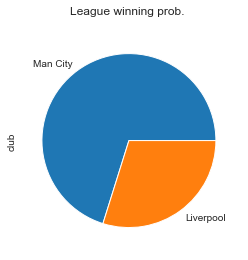

In [15]:
ax = title_race.plot.pie()
ax.set_title('League winning prob. \n')
plt.show()

In [33]:
4/9

0.4444444444444444

In [29]:
1/( 1.57)

0.6369426751592356

In [30]:
1/(2.57)

0.38910505836575876

In [16]:
top_4 = (rankings_df.loc[
    rankings_df.position < 5,'club'].value_counts() / SAMPLE_NUM)


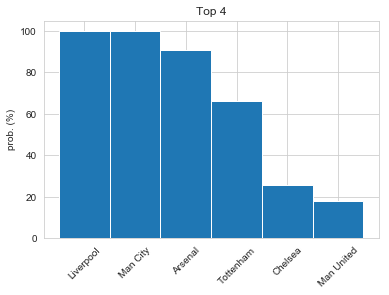

In [17]:
elo.plot_series(top_4.index,top_4 * 100,'Top 4')

In [18]:
pd.DataFrame(top_4).reset_index()

,index,club
0,Liverpool,1.00000
1,Man City,1.00000
2,Arsenal,0.90620
3,Tottenham,0.66069
4,Chelsea,0.25575
5,Man United,0.17736


In [19]:
religated = rankings_df.loc[rankings_df.position > 17,'club'].value_counts() / SAMPLE_NUM

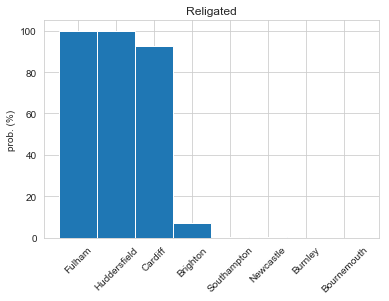

In [20]:
elo.plot_series(religated.index,religated * 100,'Religated')

In [21]:
points_df = pd.melt(pd.DataFrame(points_totals)).rename(columns={'variable':'club',
                           'value':'points'})

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


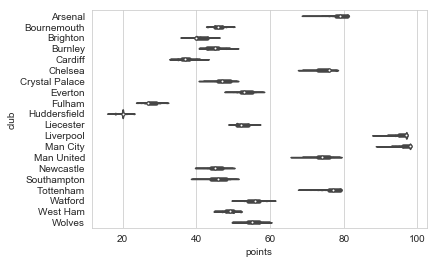

In [22]:
sns.violinplot(data=points_df,y='club',x='points')